<a href="https://colab.research.google.com/github/SanjanaTS-13/TCS-iON-Forecasting/blob/main/Forecasting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries and Data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools
import seaborn as sns

In [ ]:
import matplotlib
matplotlib.rcParams['axes.labelsize']=15
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [ ]:
df=pd.read_excel("https://github.com/SanjanaTS-13/TCS-iON-Forecasting/blob/main/superstoresales.xls?raw=true")

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## Cleaning and processing the data
### Furniture


In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [ ]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [ ]:
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [ ]:
furniture = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [ ]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [ ]:
y_f= furniture['Sales'].resample('MS').mean()
print(y_f['2017':])

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


### Office supplies

In [ ]:
office= df.loc[df['Category'] == 'Office Supplies']
office

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [ ]:
office['Order Date'].min(),office['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols,axis=1,inplace=True)
office

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [ ]:
office = office.sort_values('Order Date')
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
office

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430
...,...
2017-12-26,814.594
2017-12-27,13.248
2017-12-28,1091.244


In [ ]:
office.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [ ]:
y_o= office['Sales'].resample('MS').mean()
print(y_o['2017':])

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64


### Technology

In [ ]:
technology= df.loc[df['Category'] == 'Technology']
technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [ ]:
technology['Order Date'].min(),technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
technology.drop(cols,axis=1,inplace=True)
technology = technology.sort_values('Order Date')
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
technology

,Sales
Order Date,
2014-01-06,1147.940
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
2014-01-16,124.200
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


In [ ]:
y_t= technology['Sales'].resample('MS').mean()
print(y_t['2017':])

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64


## Visualisation 

Text(0.5, 1.0, 'Furniture sales')

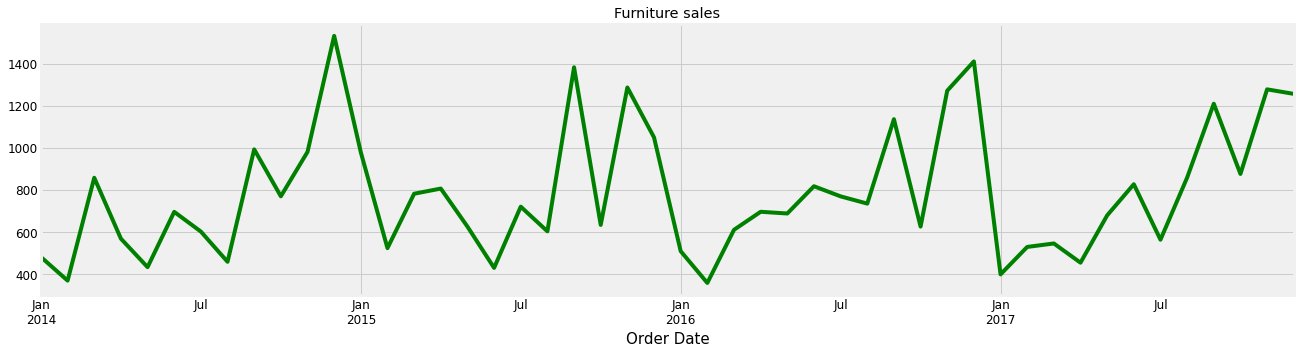

In [ ]:
#furniture mean sales
y_f.plot(figsize=(20,5),color='g')
plt.title("Furniture sales")

Text(0.5, 1.0, 'Office supply sales')

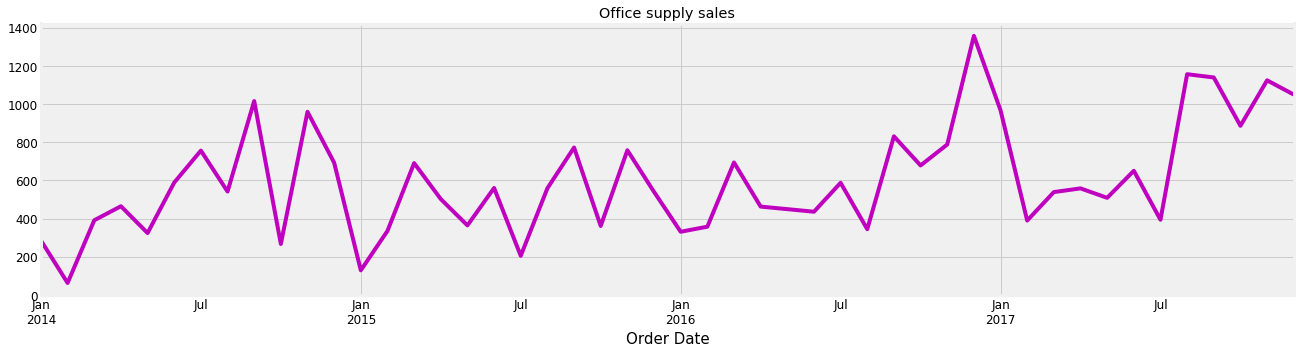

In [ ]:
#office supply mean sales
y_o.plot(figsize=(20,5),color='m')
plt.title("Office supply sales")

Text(0.5, 1.0, 'Technology sales')

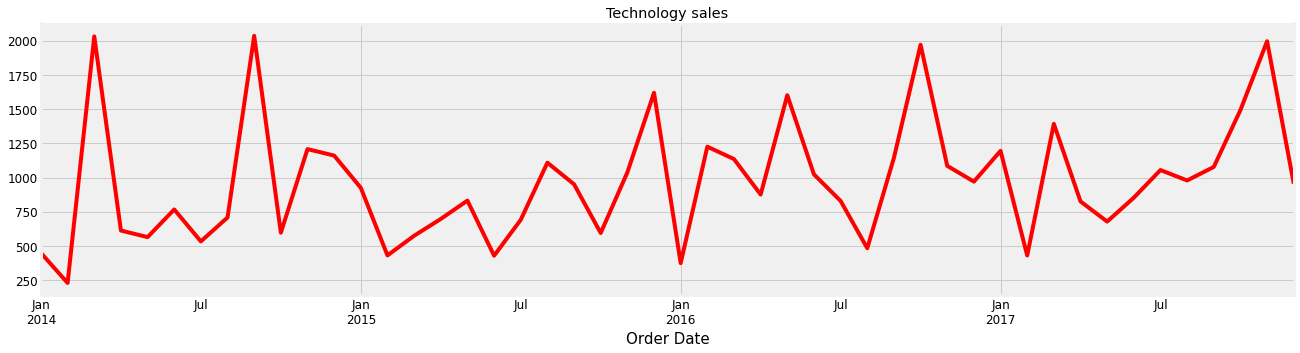

In [ ]:
#technology mean sales
y_t.plot(figsize=(20,5),color='r')
plt.title("Technology sales")

## Decomposition

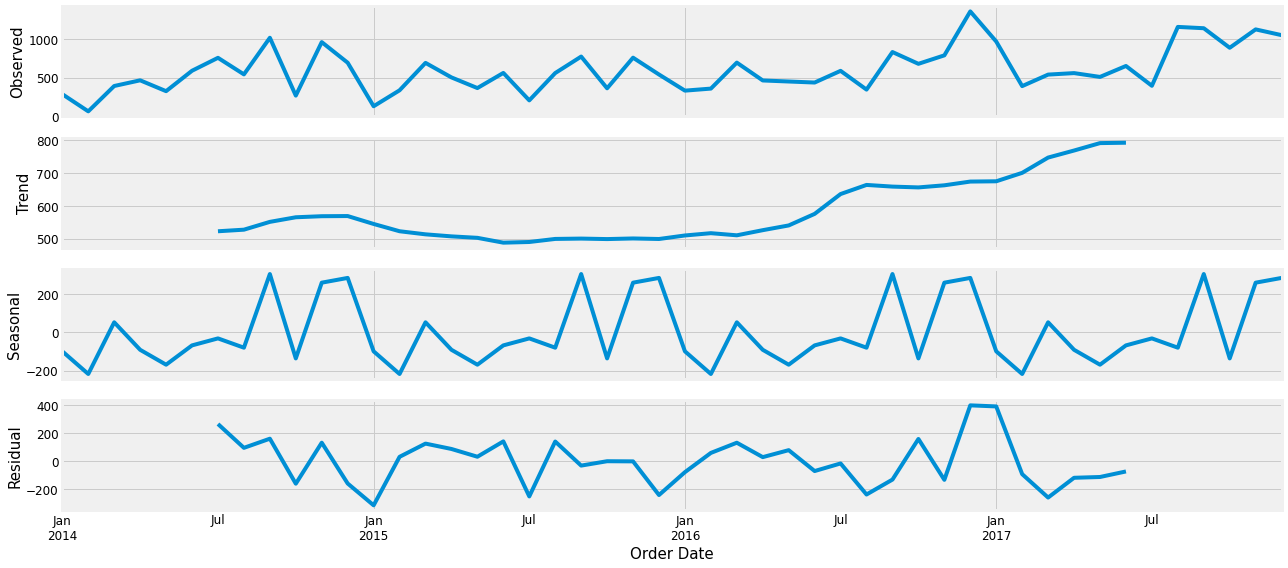

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition_office = sm.tsa.seasonal_decompose(y_o,model='additive')
fig = decomposition_office.plot()
plt.show()

## p d q

In [ ]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX:(0, 0, 1)X(0, 0, 1, 12)
SARIMAX:(0, 0, 1)X(0, 1, 0, 12)
SARIMAX:(0, 1, 0)X(0, 1, 1, 12)
SARIMAX:(0, 1, 0)X(1, 0, 0, 12)


ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:769.0817523205916
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1477.694832748855
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:477.71701309202774
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:497.2314433418337
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1222.1361261153736
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:318.0047199116341
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:720.9252270758116
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2856.247439629566
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:466.5607429809134
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:499.5815754980983
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2470.752500228863
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:319.98848769468657
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:677.894766843944
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1305.7663579990055
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:486.6378567198382
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:497.78896630044073
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1371.604667657787
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:319.7714068109211
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:649.905

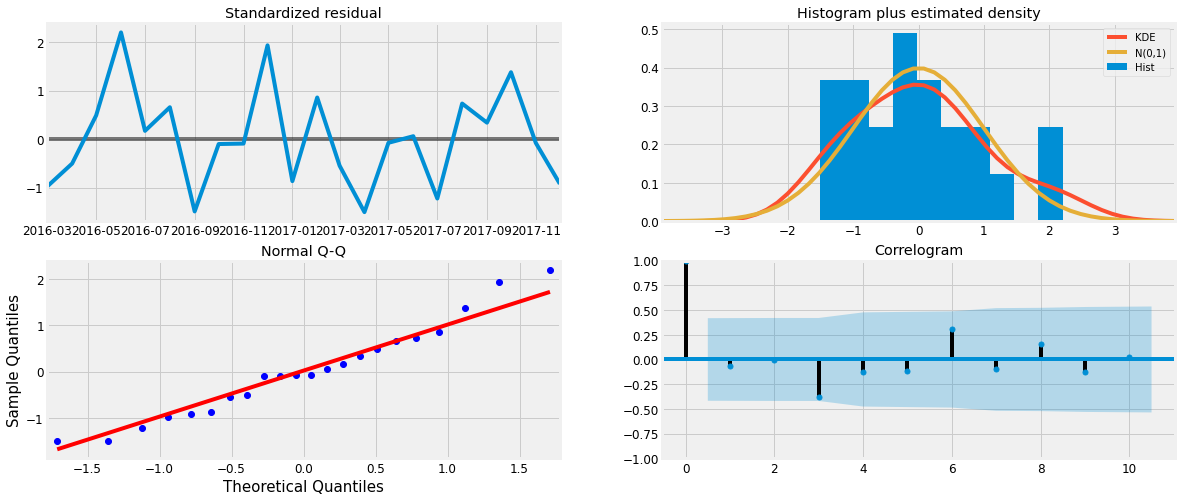

In [ ]:
warnings.filterwarnings("ignore")
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(y_f,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False )
            results=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

mod =sm.tsa.statespace.SARIMAX(y_f,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_f=mod.fit()
print(results_f.summary().tables[1])
results_f.plot_diagnostics()
plt.show()

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:747.1990404227043
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1355.2814395271387
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:500.7335398750499
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:516.0876543936834
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1493.1997884252014
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:347.44488563489716
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:702.6891395292472
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2982.625624624221
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:487.7601415814778
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:517.4952646587149
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2723.4999265963424
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:345.69220944601375
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:666.4572045007284
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1099.1615424664947
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:503.0840747609876
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:500.0109385290892
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1253.6818626092008
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:335.7148959418817
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:637.

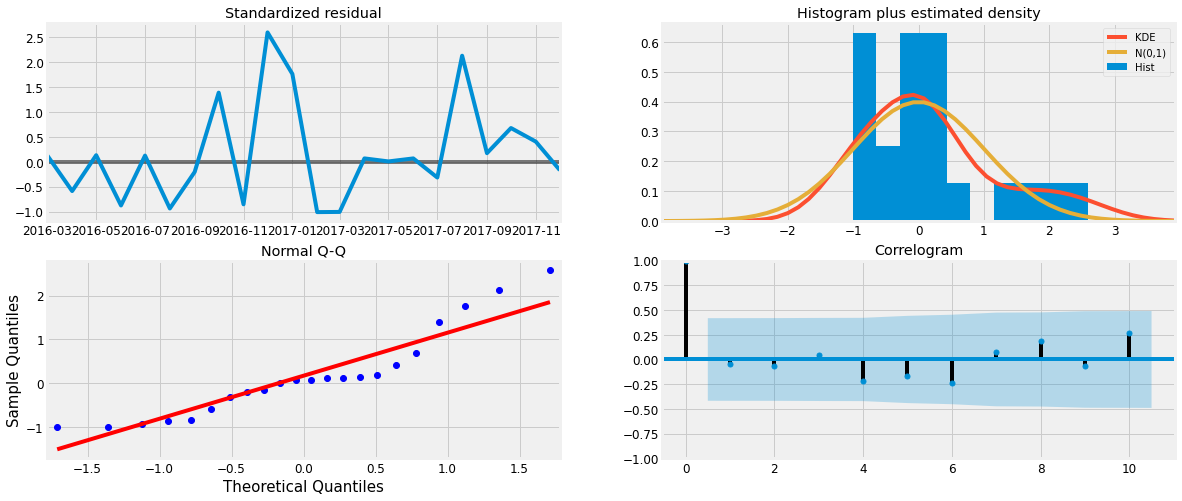

In [ ]:

warnings.filterwarnings("ignore")
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(y_o,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

mod =sm.tsa.statespace.SARIMAX(y_o,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_o=mod.fit()
print(results_o.summary().tables[1])
results_o.plot_diagnostics()
plt.show()
 

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:791.4891765009954
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1584.5361008249356
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:549.0156237882128
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:564.1031529698099
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:542.9210079120229
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:372.6612068172691
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:750.8969484750893
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:3197.483956287273
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:535.0489454747216
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:566.08279040281
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:526.5322596458968
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:373.87600658686597
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:729.3478530237927
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1322.047486065406
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:562.7585881217353
ARIMA(0, 1, 0)X(1, 0, 0, 12)12-AIC:543.3082156228088
ARIMA(0, 1, 0)X(1, 0, 1, 12)12-AIC:1364.5006276954323
ARIMA(0, 1, 0)X(1, 1, 0, 12)12-AIC:377.0354481434961
ARIMA(0, 1, 1)X(0, 0, 0, 12)12-AIC:675.959989

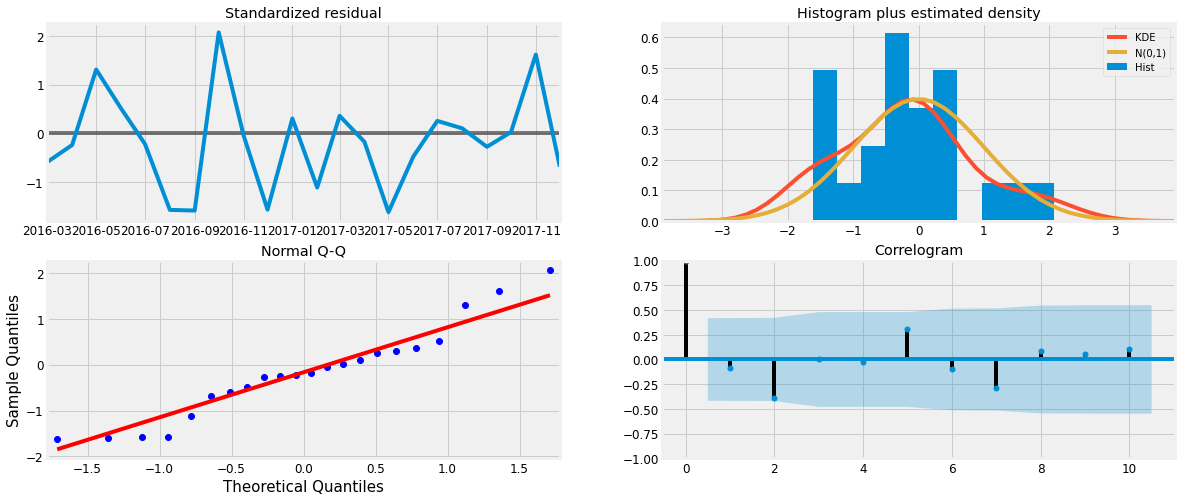

In [ ]:
warnings.filterwarnings("ignore")
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(y_t,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

mod =sm.tsa.statespace.SARIMAX(y_t,order=(1,1,1),seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results_t=mod.fit()
print(results_t.summary().tables[1])
results_t.plot_diagnostics()
plt.show()

## Prediction

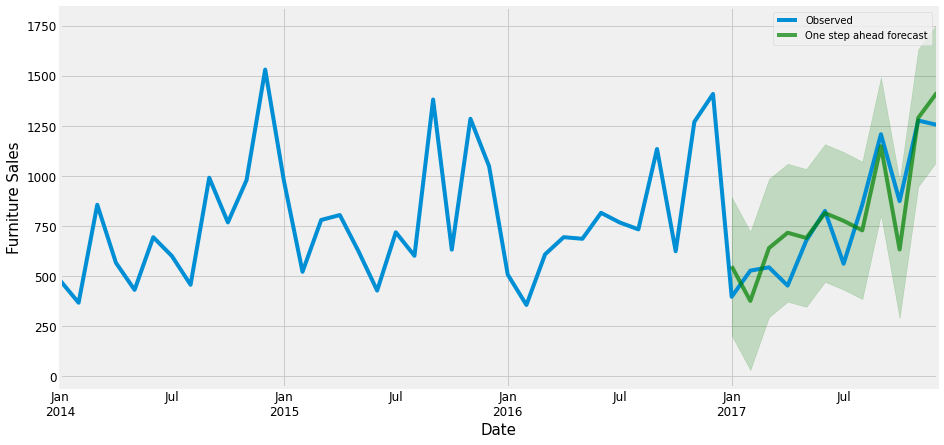

In [ ]:


#Furniture Sales
pred = results_f.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax = y_f['2014':].plot(label="Observed")
pred.predicted_mean.plot(ax=ax,label="One step ahead forecast",color = 'g',alpha=0.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='g',alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


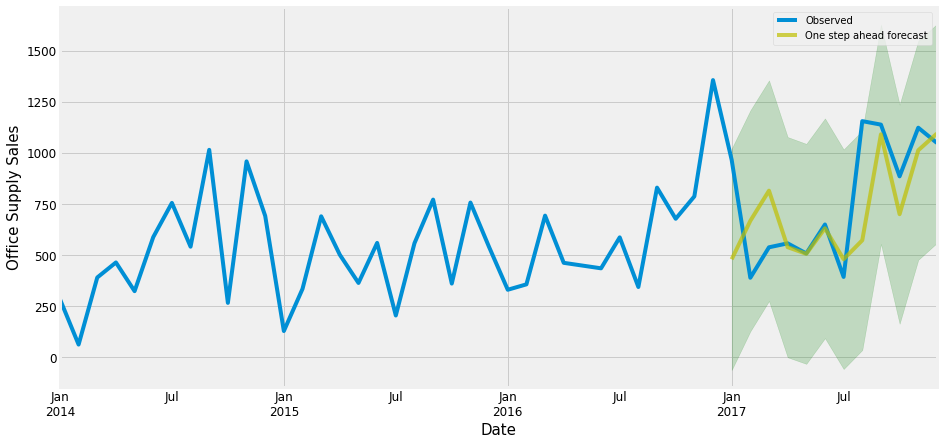

In [ ]:

#Office Supply Sales
pred = results_o.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax = y_o['2014':].plot(label="Observed")
pred.predicted_mean.plot(ax=ax,label="One step ahead forecast",alpha=0.7,color ='y',figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='g',alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supply Sales')
plt.legend()
plt.show()

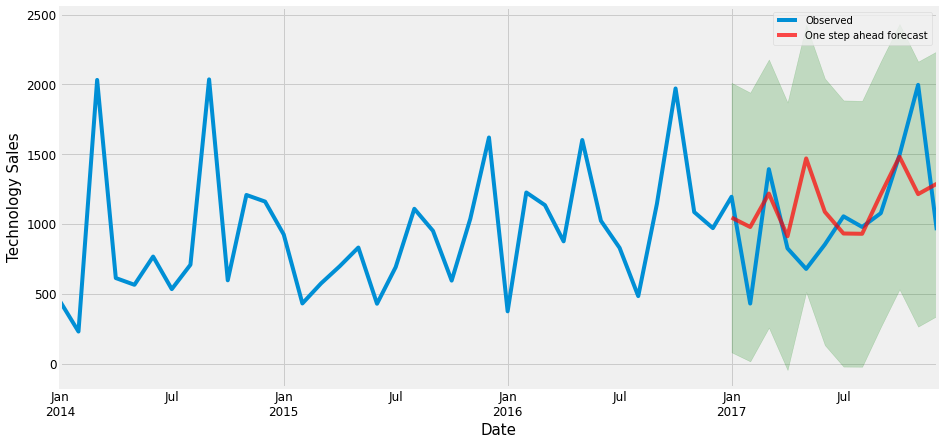

In [ ]:
#Technology Sales
pred = results_t.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax = y_t['2014':].plot(label="Observed")
pred.predicted_mean.plot(ax=ax,label="One step ahead forecast",alpha=0.7,color ='r',figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='g',alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

## Validating using MSE

In [ ]:
#Furniture sales
y_f_forecast=pred.predicted_mean
y_f_truth=y_f['2017-01-01':]
msef=((y_f_forecast-y_f_truth)**2).mean()
print("Mean Squared Error of forecast is {}".format(round(msef,2)))
print("Root Mean Squared Error of forecast is {}".format(round(np.sqrt(msef),2)))

Mean Squared Error of forecast is 208085.79
Root Mean Squared Error of forecast is 456.16


In [ ]:
#Office supply sales
y_o_forecast=pred.predicted_mean
y_o_truth=y_o['2017-01-01':]
mseo=((y_o_forecast-y_o_truth)**2).mean()
print("Mean Squared Error of forecast is {}".format(round(mseo,2)))
print("Root Mean Squared Error of forecast is {}".format(round(np.sqrt(mseo),2)))

Mean Squared Error of forecast is 235051.58
Root Mean Squared Error of forecast is 484.82


In [ ]:
#Technology sales
y_t_forecast=pred.predicted_mean
y_t_truth=y_t['2017-01-01':]
mset=((y_t_forecast-y_t_truth)**2).mean()
print("Mean Squared Error of forecast is {}".format(round(mset,2)))
print("Root Mean Squared Error of forecast is {}".format(round(np.sqrt(mset),2)))

Mean Squared Error of forecast is 150095.64
Root Mean Squared Error of forecast is 387.42


## Visualise forcast

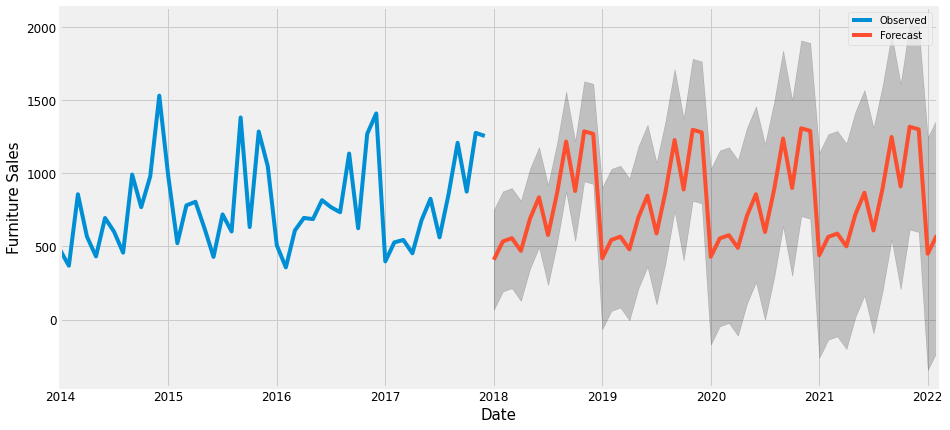

In [ ]:
pred_uc= results_f.get_forecast(steps=50)
pred_ci=pred_uc.conf_int()
ax = y_f.plot(label="Observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

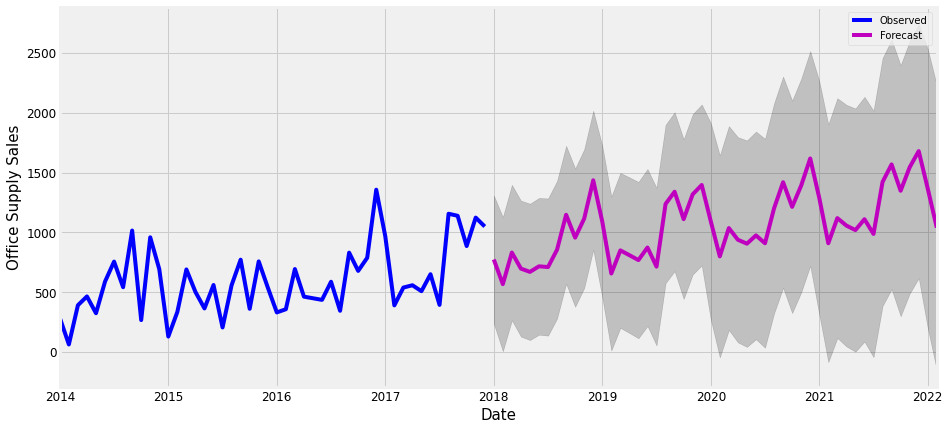

In [ ]:
pred_uc= results_o.get_forecast(steps=50)
pred_ci=pred_uc.conf_int()
ax = y_o.plot(label="Observed",figsize=(14,7),color='b')
pred_uc.predicted_mean.plot(ax=ax,label='Forecast',color='m')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Office Supply Sales")
plt.legend()

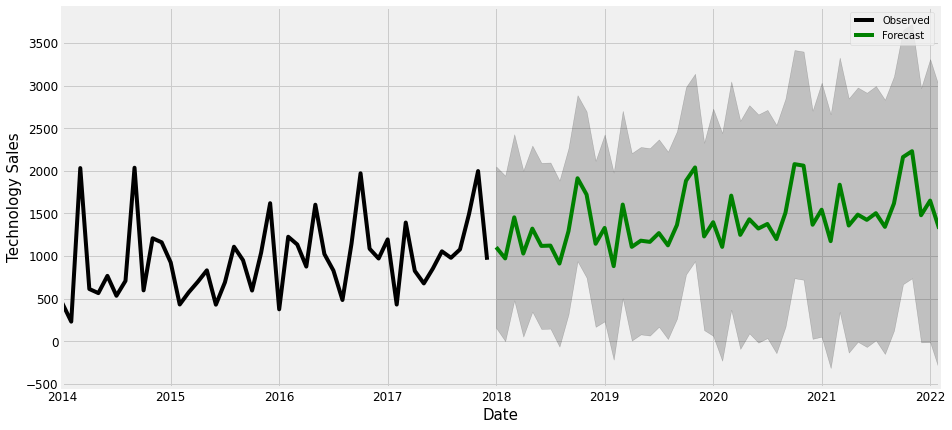

In [ ]:
pred_uc= results_t.get_forecast(steps=50)
pred_ci=pred_uc.conf_int()
ax = y_t.plot(label="Observed",figsize=(14,7),color='k')
pred_uc.predicted_mean.plot(ax=ax,label='Forecast',color='g')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Technology Sales")
plt.legend()

## Comparing 2 categories 

In [ ]:
technology=df.loc[df['Category']== "Technology"]
office=df.loc[df['Category']== "Office Supplies"]
technology.shape , office.shape
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols,axis=1,inplace=True)
office.drop(cols,axis=1,inplace=True)
office = office.sort_values('Order Date')
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
technology = technology.sort_values('Order Date')
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
y_technology= technology['Sales'].resample('MS').mean()
y_office= office['Sales'].resample('MS').mean()
office = pd.DataFrame({'Order Date': y_office.index , 'Sales':y_office.values})
technology = pd.DataFrame({'Order Date': y_technology.index , 'Sales':y_technology.values})

#merging
store = technology.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x':'Technology_sales','Sales_y':'Office_sales'},inplace=True)
store.head()

,Order Date,Technology_sales,Office_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545


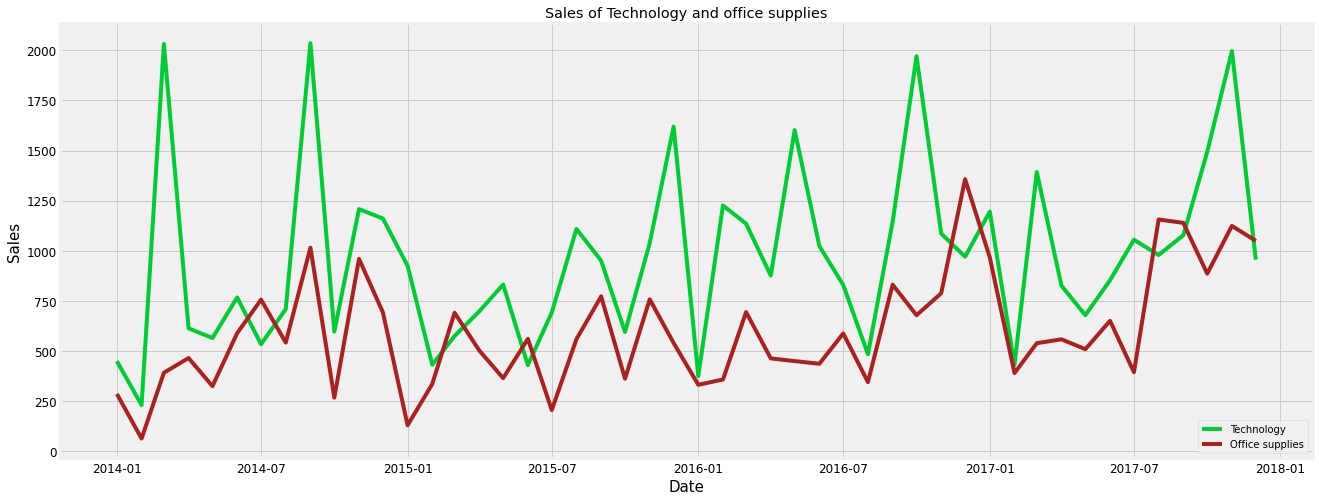

In [ ]:

plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['Technology_sales'],'#00cd34',label='Technology')
plt.plot(store['Order Date'],store['Office_sales'],'#aa2121',label='Office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Technology and office supplies')
plt.legend()

In [ ]:
furniture=df.loc[df['Category']== "Furniture"]
furniture.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y_furniture= furniture['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date': y_furniture.index , 'Sales':y_furniture.values})


In [ ]:
store_3 = store.merge(furniture, how='inner', on='Order Date')
store_3.rename(columns={'Sales':'Furniture_sales'},inplace=True)
store_3

,Order Date,Technology_sales,Office_sales,Furniture_sales
0,2014-01-01,449.041429,285.357647,480.194231
1,2014-02-01,229.787143,63.042588,367.931600
2,2014-03-01,2031.948375,391.176318,857.291529
3,2014-04-01,613.028933,464.794750,567.488357
4,2014-05-01,564.698588,324.346545,432.049188
5,2014-06-01,766.905909,588.774409,695.059242
6,2014-07-01,533.608933,756.060400,601.169500
7,2014-08-01,708.435385,541.879143,457.521656
8,2014-09-01,2035.838133,1015.677704,992.353367
9,2014-10-01,596.900900,267.078815,769.015437


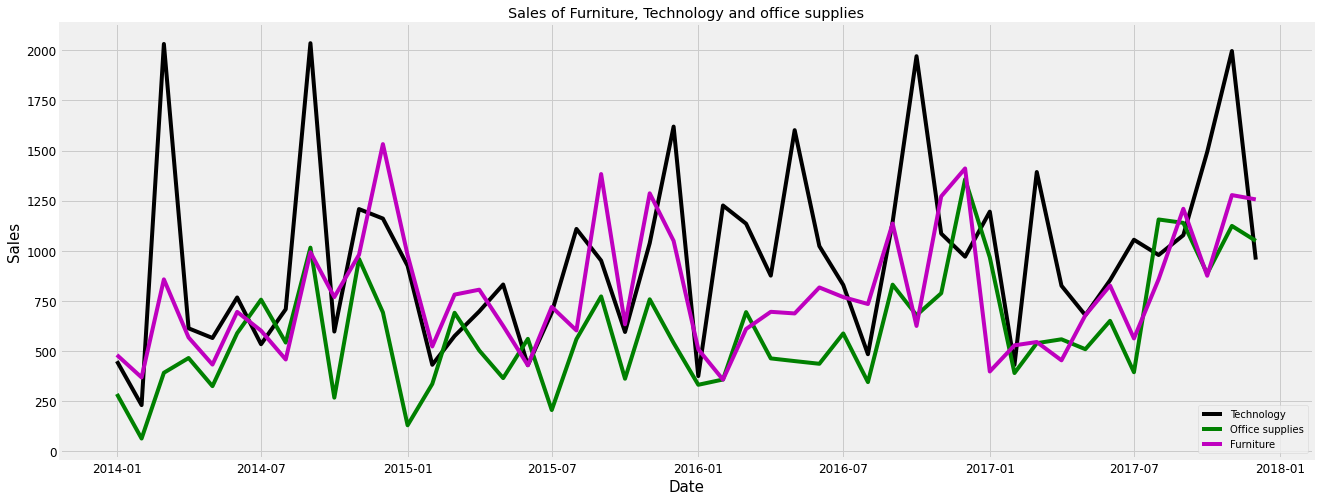

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(store_3['Order Date'],store_3['Technology_sales'],'#000000',label='Technology')
plt.plot(store_3['Order Date'],store_3['Office_sales'],'g',label='Office supplies')
plt.plot(store_3['Order Date'],store_3['Furniture_sales'],'m',label='Furniture')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture, Technology and office supplies')
plt.legend()

## Time series modelling with Prophet

In [ ]:
from fbprophet import Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Office Supply sales')

<Figure size 1296x432 with 0 Axes>

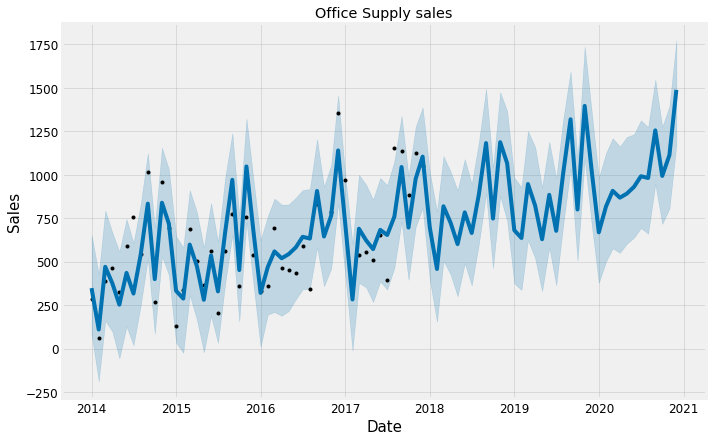

In [ ]:

office1 = office.rename(columns={'Order Date':'ds', 'Sales':'y'})
office_model=Prophet(interval_width=0.95)
office_model.fit(office1)

office1_forecast=office_model.make_future_dataframe(periods=36, freq='MS')
office1_forecast=office_model.predict(office1_forecast)

plt.figure(figsize=(18,6))
office_model.plot(office1_forecast,xlabel='Date', ylabel='Sales')
plt.title("Office Supply sales")


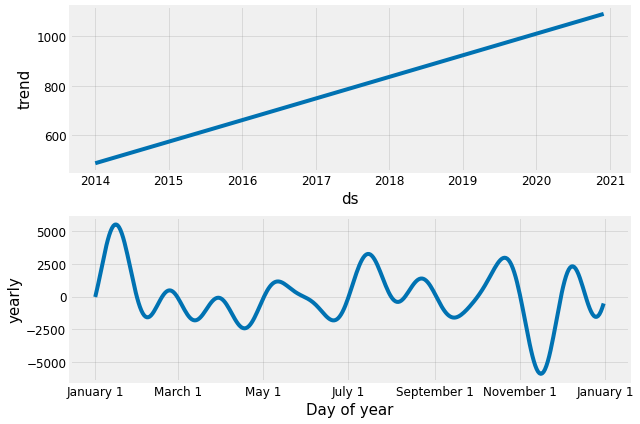

In [ ]:
office_model.plot_components(office1_forecast);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Technology sales')

<Figure size 1296x432 with 0 Axes>

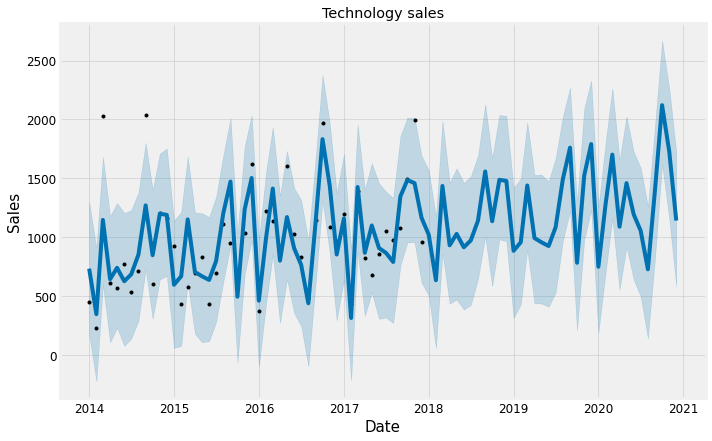

In [ ]:
technology1 = technology.rename(columns={'Order Date':'ds', 'Sales':'y'})
technology_model=Prophet(interval_width=0.95)
technology_model.fit(technology1)

technology1_forecast=technology_model.make_future_dataframe(periods=36, freq='MS')
technology1_forecast=technology_model.predict(technology1_forecast)

plt.figure(figsize=(18,6))
technology_model.plot(technology1_forecast,xlabel='Date', ylabel='Sales')
plt.title("Technology sales")

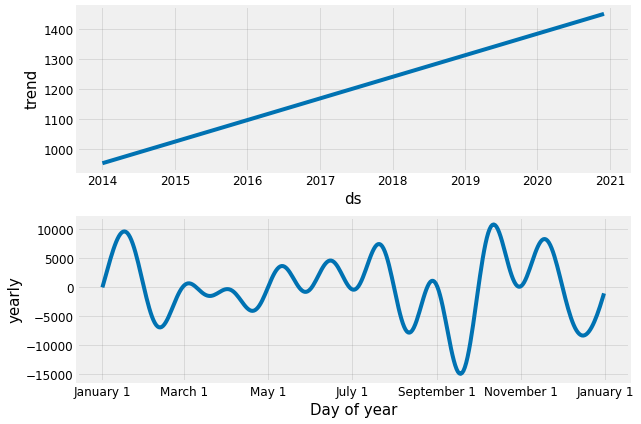

In [ ]:
technology_model.plot_components(technology1_forecast);